In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import mpl_toolkits
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
%matplotlib inline

reg = LinearRegression()

In [19]:
datafile2 = pd.read_csv('loan.csv')
dataset2 = datafile2.fillna(0)
dataset2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


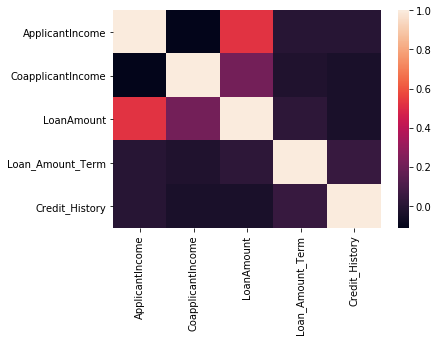

In [20]:
sns.heatmap(dataset2.corr())
plt.show()
plt.rcParams['figure.figsize'] = (10, 7)

Correlation between LoanAmount and ApplicantIncome is (0.5)

Correlation between LoanAmount and CoapplicantIncome is (0.2)

Correlation between LoanAmount and Loan_Amount_Term  is (0.1)

Correlation between LoanAmount and Credit_History is (0.0)

Correlation between LoanAmount and Loan_Status is (0.0)

**Relationship significant**

In [21]:
dataset2.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.113043,0.524872,0.000083,0.001500
CoapplicantIncome,-0.113043,1.000000,0.213266,-0.021310,-0.035240
LoanAmount,0.524872,0.213266,1.000000,0.019654,-0.036075
Loan_Amount_Term,0.000083,-0.021310,0.019654,1.000000,0.049682
Credit_History,0.001500,-0.035240,-0.036075,0.049682,1.000000


 yes the relationship significant because of the values in the corr matrix

**LINEAR REGRESSIONS ASSUMPTIONS**

Linear relationship

Multivariate normality

No or little multicollinearity

No auto-correlation

Homoscedasticity

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [23]:

x = dataset2[["ApplicantIncome","CoapplicantIncome", "Loan_Amount_Term"]]
y = dataset2["LoanAmount"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


[ 115.42359177  131.29477167  121.98550838  124.69137736  104.46219476]
68.4314509824
0.407836911436


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


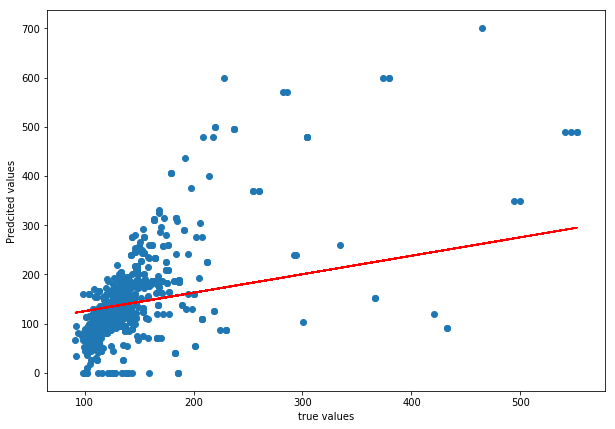

In [24]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
print(predictions[0:5])

fig, ax = plt.subplots()
fit = np.polyfit(y_test, predictions,deg=1)
ax.plot(predictions, fit[0] * predictions + fit[1], color='red')
ax.scatter(predictions, y_test)
plt.xlabel("true values")
plt.ylabel("Predcited values")

ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print(rmse)

fig.show()

print(lm.score(X_test,y_test))

Residual Plot

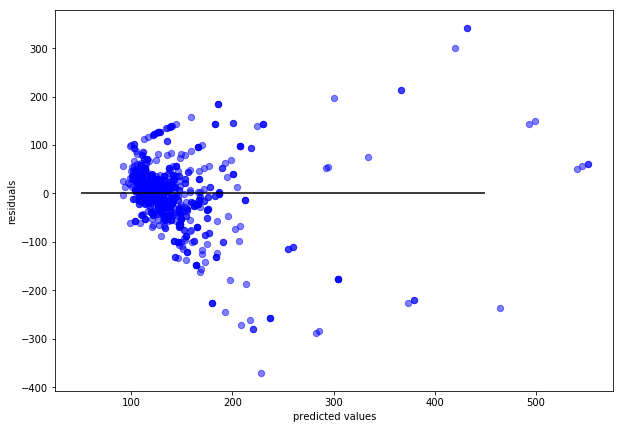

In [25]:
plt.scatter(predictions, predictions-y_test, c='b', s=40, alpha=0.5)
plt.hlines(y=0, xmin=50, xmax=450)
plt.ylabel('residuals')
plt.xlabel('predicted values')

PROBABILITY NORM PLOT

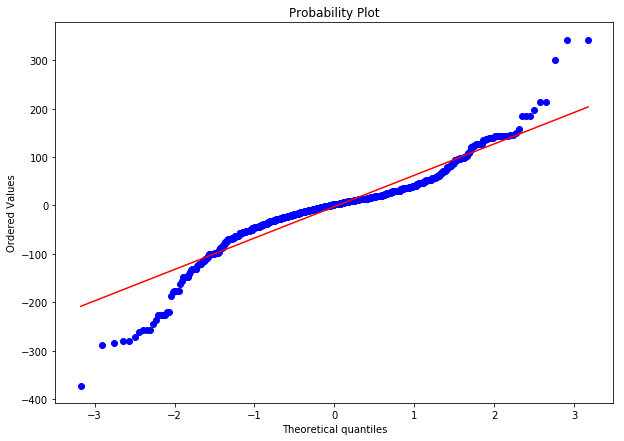

In [26]:
import scipy.stats as st
st.probplot(predictions-y_test, dist='norm',plot=plt)
plt.show()

**Model assumptions:**
1) linearity: the model is linear in nature as you can see from the above graph
    that the values are symmetrical to the line of regression hence sulfilling the 
    assumption
    
2) violation of independence is also satisified in this case as the graph
Independence can also be violated in non-time-series models if errors tend to always have the same sign under particular conditions, which is not evident from the residual plot

3) homoscedasticity is also satisfied from the above graph as the values are 
in proportion with the function of the predicted values, very few values are out of range

4) violations of normality is also satisfied since the values in the above graph are very close to the fit line

a. LoanAmount vs ApplicantIncome   (0.59)

In [27]:
import statsmodels.api as sm

xa = dataset2[["ApplicantIncome"]]
ya = dataset2["LoanAmount"]
model = sm.OLS(ya, xa)
results = model.fit()
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Parameters:  ApplicantIncome    0.015514
dtype: float64
R2:  0.590214353386


In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     4396.
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:01:43   Log-Likelihood:                -18564.
No. Observations:                3053   AIC:                         3.713e+04
Df Residuals:                    3052   BIC:                         3.714e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
ApplicantIncome     0.0155      0.000     66.301      0.000       0.015       0.016
==============================================================================
Omnibus:                     2465.444   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130983.522
Skew:                          -3.424   Prob(JB):                         0.00
Kurtosis:                      34.349   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b. LoanAmount vs Credit_History (0.55)

In [29]:
xb = dataset2[["Credit_History"]]
yb = dataset2["LoanAmount"]
model = sm.OLS(yb, xb)
results2 = model.fit()
print('Parameters: ', results2.params)
print('R2: ', results2.rsquared)

Parameters:  Credit_History    138.870968
dtype: float64
R2:  0.552052252149


In [30]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     3761.
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:01:43   Log-Likelihood:                -18699.
No. Observations:                3053   AIC:                         3.740e+04
Df Residuals:                    3052   BIC:                         3.741e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Credit_History   138.8710      2.264     61.329      0.000     134.431     143.311
==============================================================================
Omnibus:                     1002.357   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3861.631
Skew:                           1.587   Prob(JB):                         0.00
Kurtosis:                       7.504   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c. LoanAmount vs Loan_Amount_Term  (0.68)

In [31]:
x = dataset2[["Loan_Amount_Term"]]
y = dataset2["LoanAmount"]
model = sm.OLS(y, x)
results3 = model.fit()
print('Parameters: ', results3.params)
print('R2: ', results3.rsquared)

Parameters:  Loan_Amount_Term    0.396665
dtype: float64
R2:  0.683753337291


In [32]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     6599.
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:01:43   Log-Likelihood:                -18168.
No. Observations:                3053   AIC:                         3.634e+04
Df Residuals:                    3052   BIC:                         3.634e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Loan_Amount_Term     0.3967      0.005     81.232      0.000       0.387       0.406
==============================================================================
Omnibus:                     1280.720   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7114.925
Skew:                           1.931   Prob(JB):                         0.00
Kurtosis:                       9.405   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Rank the most significant predictor variables**

Now, we have individually modelled the highly correlated columns to the price and got the R-Squared value for their linear models.

As per the observation, the highest R-square value was observed when the predictor "Loan_Amount_Term" was used (0.68).

Hence now to further move ahead, we will choose the model with Loan_Amount_Term and keep adding new predictors to it and analyze the results

Adding other columns to the given simple linear model:

a. Coapplicant Income (0.70)

In [33]:
X = dataset2[["Loan_Amount_Term", "CoapplicantIncome"]]
y = dataset2["LoanAmount"]
model = sm.OLS(y, X)
results = model.fit()
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  Loan_Amount_Term     0.356486
CoapplicantIncome    0.008846
dtype: float64
R2:  0.704578576479


In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     3638.
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:01:43   Log-Likelihood:                -18064.
No. Observations:                3053   AIC:                         3.613e+04
Df Residuals:                    3051   BIC:                         3.614e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Loan_Amount_Term      0.3565      0.005     65.316      0.000       0.346       0.367
CoapplicantIncome     0.0088      0.001     14.665      0.000       0.008       0.010
==============================================================================
Omnibus:                     1358.333   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9533.780
Skew:                           1.977   Prob(JB):                         0.00
Kurtosis:                      10.701   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b.  ApplicantIncome (0.78)

In [35]:
X = dataset2[["ApplicantIncome", "Loan_Amount_Term"]]
y = dataset2["LoanAmount"]
model = sm.OLS(y, X)
results = model.fit()
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  ApplicantIncome     0.008185
Loan_Amount_Term    0.272392
dtype: float64
R2:  0.780945162096


In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     5439.
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:01:43   Log-Likelihood:                -17608.
No. Observations:                3053   AIC:                         3.522e+04
Df Residuals:                    3051   BIC:                         3.523e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ApplicantIncome      0.0082      0.000     36.793      0.000       0.008       0.009
Loan_Amount_Term     0.2724      0.005     51.541      0.000       0.262       0.283
==============================================================================
Omnibus:                      466.812   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3111.449
Skew:                           0.546   Prob(JB):                         0.00
Kurtosis:                       7.823   Cond. No.                         30.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Multi-colinearity in the model**

In order to know the multi-colinearity in model, we use VIF(Variance Inflation Factor)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Split dependent and Independent variables

X = dataset2[["ApplicantIncome","CoapplicantIncome", "Loan_Amount_Term"]]
y = dataset2["LoanAmount"]

VIF = pd.DataFrame()
VIF["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
VIF["Features"] = X.columns

print(VIF.round(1))

   VIF Factor           Features
0         1.7    ApplicantIncome
1         1.3  CoapplicantIncome
2         2.1   Loan_Amount_Term


Since none of the vif values are more than 4, there is no multi-colinearity in the model

**Multiple Regression predictor variables**

Compare Reg coeff, p-values and Change in R2 when insignificant predictor is removed.
    The p-values and the coeff can be compared as the measure of each predictor is same. Otherwise would have to scale the predictor values and then compare coeff.
 considering the coeff values from the summary we can remove the 
 independent variables which have the least coef values making them insignificant

In [38]:
import statsmodels.api as sm

x = dataset2[["ApplicantIncome","CoapplicantIncome", "Loan_Amount_Term",'Credit_History']]
y = dataset2["LoanAmount"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

(2137, 4) (2137,)
(916, 4) (916,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     2256.
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:01:43   Log-Likelihood:                -12215.
No. Observations:                2137   AIC:                         2.444e+04
Df Residuals:                    2133   BIC:                         2.446e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
ApplicantIncome       0.0087      0.000     35.354      0.000       0.008       0.009
CoapplicantIncome     0.0102      0.001     18.071      0.000       0.009       0.011
Loan_Amount_Term      0.1984      0.010     19.952      0.000       0.179       0.218
Credit_History        9.6480      3.566      2.706      0.007       2.655      16.641
==============================================================================
Omnibus:                      299.408   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3698.371
Skew:                           0.154   Prob(JB):                         0.00
Kurtosis:                       9.437   Cond. No.                     1.90e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
import statsmodels.api as sm

x = dataset2[["ApplicantIncome","Loan_Amount_Term","Credit_History"]]
y = dataset2["LoanAmount"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

(2137, 3) (2137,)
(916, 3) (916,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     2540.
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:01:43   Log-Likelihood:                -12321.
No. Observations:                2137   AIC:                         2.465e+04
Df Residuals:                    2134   BIC:                         2.467e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ApplicantIncome      0.0086      0.000     30.315      0.000       0.008       0.009
Loan_Amount_Term     0.2438      0.010     23.851      0.000       0.224       0.264
Credit_History       9.8755      3.788      2.607      0.009       2.446      17.305
==============================================================================
Omnibus:                      306.947   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2367.095
Skew:                           0.434   Prob(JB):                         0.00
Kurtosis:                       8.082   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see above, after removing a variable, there is not much difference in the R2 value.

**Multiple Regression Model**

c. 3 independant values and 1 dependant value

In [40]:
X = dataset2[["ApplicantIncome","CoapplicantIncome", "Loan_Amount_Term"]]
y = dataset2["LoanAmount"]
model = sm.OLS(y, X)
results = model.fit()
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  ApplicantIncome      0.008510
CoapplicantIncome    0.010308
Loan_Amount_Term     0.220642
dtype: float64
R2:  0.809068603761


In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4308.
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:01:43   Log-Likelihood:                -17398.
No. Observations:                3053   AIC:                         3.480e+04
Df Residuals:                    3050   BIC:                         3.482e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
ApplicantIncome       0.0085      0.000     40.855      0.000       0.008       0.009
CoapplicantIncome     0.0103      0.000     21.196      0.000       0.009       0.011
Loan_Amount_Term      0.2206      0.006     40.074      0.000       0.210       0.231
==============================================================================
Omnibus:                      427.277   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5388.653
Skew:                           0.160   Prob(JB):                         0.00
Kurtosis:                       9.501   Cond. No.                         34.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
status = [1 if values == 'Y' else 0 for values in dataset2.Loan_Status]     

dataset2['Loan_Status'] = status
y = dataset2['Loan_Status']

x = dataset2.iloc[:,[6,8]].values            #applicant income

In [43]:
dataset2.Loan_Status.unique()

array([1, 0], dtype=int64)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 2)

In [45]:
print (x_train)

[[ 6083.   330.]
 [ 3087.   136.]
 [ 1916.    67.]
 ..., 
 [ 5116.   165.]
 [ 5516.   495.]
 [ 3430.   128.]]


In [46]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
#reg.score(x_test, y_test)
y_predict=reg.predict(x_test)
y_predict

array([ 0.68124703,  0.7025606 ,  0.70385837,  0.69494189,  0.69950139,
        0.67225039,  0.69892876,  0.70050843,  0.69570009,  0.67119791,
        0.70845853,  0.69735946,  0.70653773,  0.6967562 ,  0.69768786,
        0.70892846,  0.70252482,  0.62818878,  0.69267802,  0.6894602 ,
        0.7025606 ,  0.70159684,  0.69469675,  0.69877717,  0.68992092,
        0.68366482,  0.69900912,  0.69527597,  0.6977346 ,  0.70435937,
        0.70092905,  0.70051648,  0.68676026,  0.70135382,  0.70170247,
        0.69565703,  0.70051648,  0.7130424 ,  0.69238849,  0.69080136,
        0.70138021,  0.69997491,  0.71892698,  0.69500759,  0.68992092,
        0.69735095,  0.69271668,  0.70866283,  0.71917111,  0.7128989 ,
        0.70208933,  0.69503656,  0.70095699,  0.70520219,  0.69885517,
        0.70282261,  0.69290234,  0.69614307,  0.70417381,  0.61660456,
        0.70328013,  0.69923006,  0.70269932,  0.70114165,  0.70097322,
        0.69751059,  0.69027374,  0.70596274,  0.70617902,  0.68

In [48]:
from sklearn import metrics
metrics.accuracy_score(y_predict.round(), y_test)

0.67647058823529416

In [49]:
y1 = dataset2['LoanAmount']
x1= dataset2.iloc[:,[6]].values       

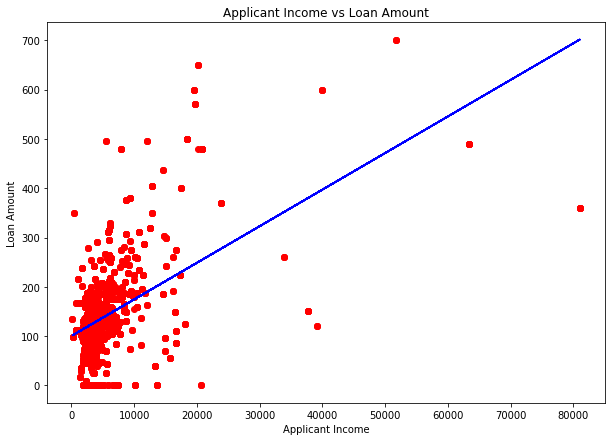

In [50]:
# Fitting Simple Linear Regression to the Training set

reg.fit(x1, y1)

# Visualising the Training set results
plt.scatter(x1, y1, color = 'red')
plt.plot(x1, reg.predict(x1), color = 'blue')
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()



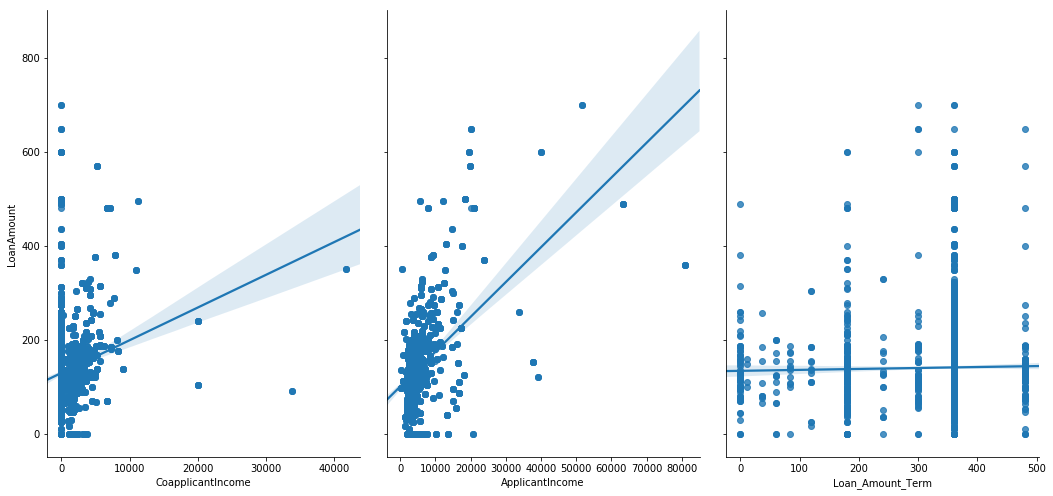

In [51]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(dataset2, x_vars=['CoapplicantIncome','ApplicantIncome','Loan_Amount_Term'], y_vars='LoanAmount', size=7, aspect=0.7, kind='reg')


**Cross Validation**

TRAIN: [1527 1528 1529 ..., 3050 3051 3052] TEST: [   0    1    2 ..., 1524 1525 1526]
TRAIN: [   0    1    2 ..., 1524 1525 1526] TEST: [1527 1528 1529 ..., 3050 3051 3052]
[ 130.3311219   137.99384579  115.12627566  225.9189287   132.40713851]
0.354172477092


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


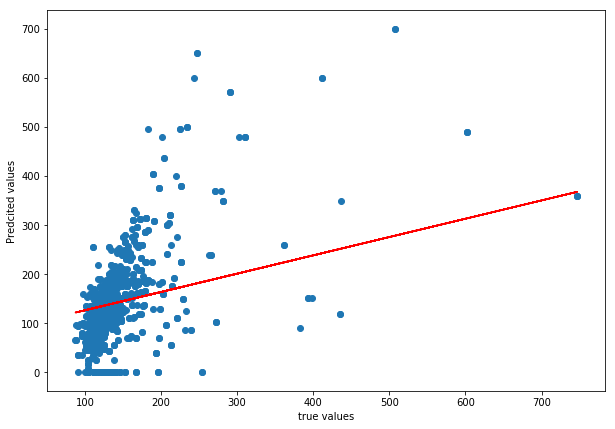

In [52]:
from sklearn.model_selection import KFold as kf
from sklearn import preprocessing, cross_validation
from sklearn import linear_model

mj = dataset2[['CoapplicantIncome','ApplicantIncome','Loan_Amount_Term']]

y = dataset2['LoanAmount']

kfk = kf(n_splits=2)
kfk.get_n_splits(mj)

for train_index, test_index in kfk.split(mj):
    print("TRAIN:",train_index,"TEST:",test_index)
    X_train, X_test = mj.iloc[train_index], mj.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
     
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
print(predictions[0:5])

fig, ax = plt.subplots()
fit = np.polyfit(y_test, predictions,deg=1)
ax.plot(predictions, fit[0] * predictions + fit[1], color='red')
ax.scatter(predictions, y_test)
plt.xlabel("true values")
plt.ylabel("Predcited values")



fig.show()

print(model.score(X_test,y_test))

The K-fold cross validation did not do well because it reduced the accuracy score to 0.35 which was 0.80 before

***Regularization***

regularization is tuning or selecting the preferred level of model complexity so your models are better at predicting.

LASSO (Least Absolute Shrinkage Selector Operator)

0.354172477276


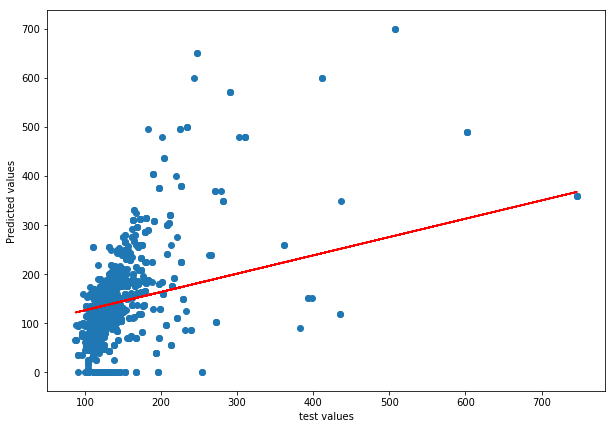

In [53]:
from sklearn.feature_selection import RFE

ridge = Ridge(fit_intercept=True, alpha=0.5)
v = ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

fig, ax = plt.subplots()
fit = np.polyfit(y_test, y_pred,deg=1)
ax.plot(y_pred, fit[0] * y_pred + fit[1], color='red')
ax.scatter(y_pred, y_test)

plt.xlabel("test values")
plt.ylabel("Predicted values")
print(v.score(X_test,y_test))

As we can see, regularization is slightly affecting the model score (0.00002)

Yes the regularization does seem to validate better on sample data